Processed 24 valid data points out of 24 files.
z = 6.5 mm, Width_x = 1.688 mm, Width_y = 1.686 mm
z = 7.0 mm, Width_x = 1.409 mm, Width_y = 1.572 mm
z = 7.5 mm, Width_x = 1.261 mm, Width_y = 1.334 mm
z = 8.0 mm, Width_x = 1.037 mm, Width_y = 1.076 mm
z = 8.5 mm, Width_x = 0.759 mm, Width_y = 0.823 mm
z = 9.0 mm, Width_x = 0.536 mm, Width_y = 0.561 mm
z = 9.5 mm, Width_x = 0.297 mm, Width_y = 0.297 mm
z = 9.6 mm, Width_x = 0.253 mm, Width_y = 0.247 mm
z = 9.7 mm, Width_x = 0.197 mm, Width_y = 0.195 mm
z = 9.8 mm, Width_x = 0.156 mm, Width_y = 0.144 mm
z = 9.9 mm, Width_x = 0.107 mm, Width_y = 0.091 mm
z = 10.0 mm, Width_x = 0.065 mm, Width_y = 0.042 mm
z = 10.1 mm, Width_x = 0.027 mm, Width_y = 0.058 mm
z = 10.2 mm, Width_x = 0.074 mm, Width_y = 0.106 mm
z = 10.3 mm, Width_x = 0.115 mm, Width_y = 0.156 mm
z = 10.4 mm, Width_x = 0.159 mm, Width_y = 0.207 mm
z = 10.5 mm, Width_x = 0.204 mm, Width_y = 0.263 mm
z = 11.0 mm, Width_x = 0.421 mm, Width_y = 0.529 mm
z = 11.5 mm, Width_x = 0.62

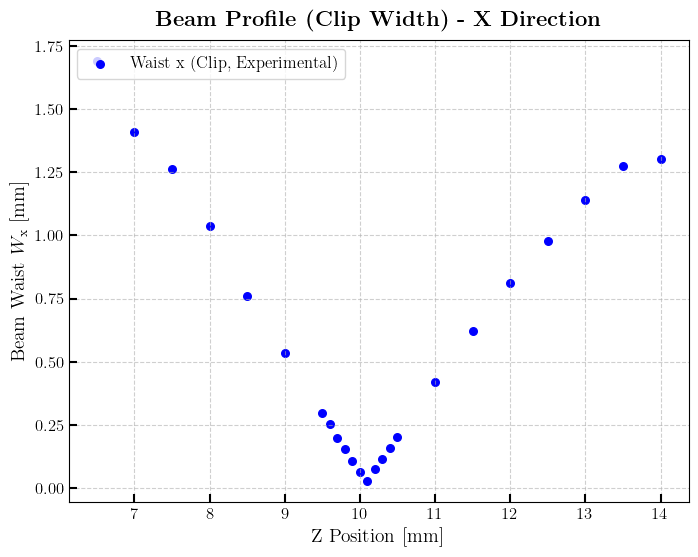

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_collimated/FINAL FINAL/fig/beam_profile_clip_y.png


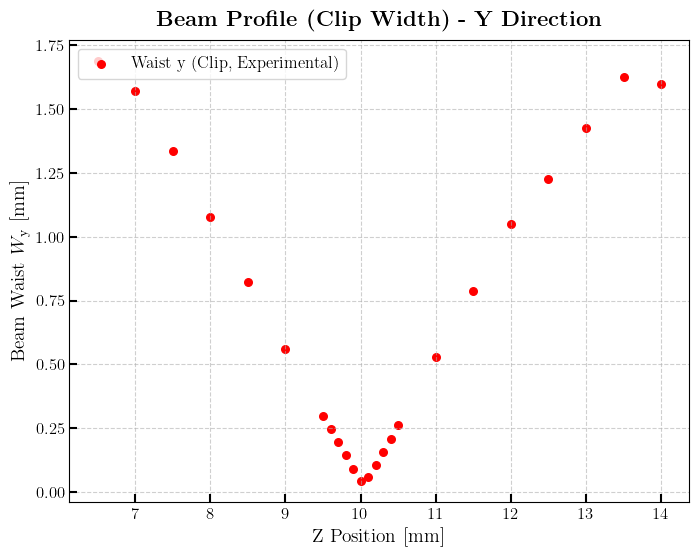

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_collimated/FINAL FINAL"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and
                    float(os.path.basename(f).split('mm')[0].strip()) >= 6.5],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 23 valid data points out of 23 files.
z = 6.5 mm, Width_x = 1.583 mm, Width_y = 1.588 mm
z = 7.0 mm, Width_x = 1.370 mm, Width_y = 1.397 mm
z = 7.5 mm, Width_x = 1.144 mm, Width_y = 1.190 mm
z = 8.0 mm, Width_x = 0.915 mm, Width_y = 0.942 mm
z = 8.5 mm, Width_x = 0.704 mm, Width_y = 0.677 mm
z = 9.0 mm, Width_x = 0.503 mm, Width_y = 0.426 mm
z = 9.5 mm, Width_x = 0.292 mm, Width_y = 0.182 mm
z = 9.6 mm, Width_x = 0.251 mm, Width_y = 0.137 mm
z = 9.7 mm, Width_x = 0.151 mm, Width_y = 0.096 mm
z = 9.8 mm, Width_x = 0.076 mm, Width_y = 0.057 mm
z = 9.9 mm, Width_x = 0.047 mm, Width_y = 0.046 mm
z = 10.0 mm, Width_x = 0.062 mm, Width_y = 0.078 mm
z = 10.1 mm, Width_x = 0.199 mm, Width_y = 0.118 mm
z = 10.2 mm, Width_x = 0.235 mm, Width_y = 0.162 mm
z = 10.3 mm, Width_x = 0.275 mm, Width_y = 0.204 mm
z = 10.4 mm, Width_x = 0.305 mm, Width_y = 0.250 mm
z = 10.5 mm, Width_x = 0.330 mm, Width_y = 0.289 mm
z = 11.0 mm, Width_x = 0.541 mm, Width_y = 0.489 mm
z = 11.5 mm, Width_x = 0.73

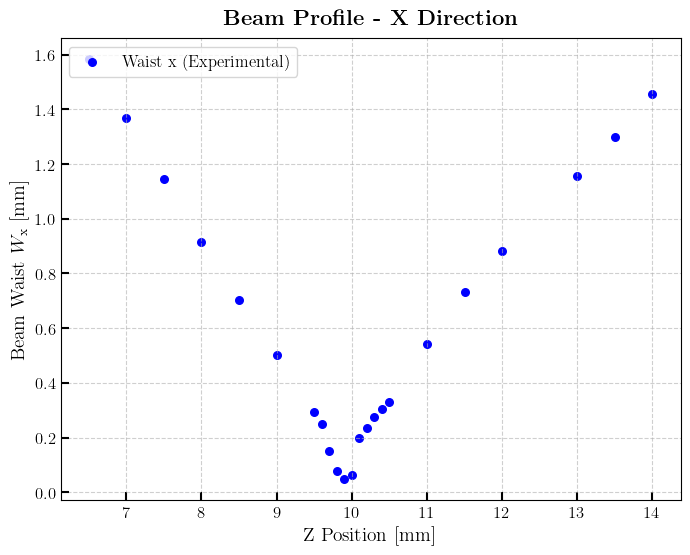

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_y.png


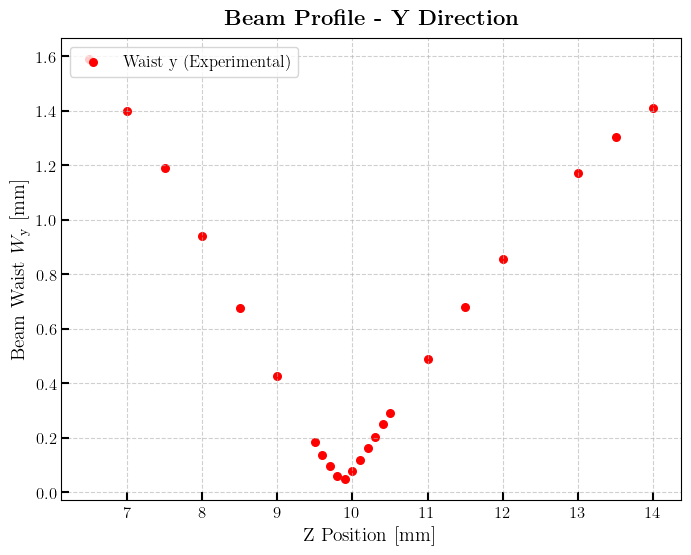

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and 
                    float(os.path.basename(f).split('mm')[0].strip()) >= 6.5],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    z_values.append(z)
    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 24 valid data points in range 4-14 mm out of 24 total files.
z = 6.5 mm, Width_x = 1.688 mm, Width_y = 1.686 mm
z = 7.0 mm, Width_x = 1.409 mm, Width_y = 1.572 mm
z = 7.5 mm, Width_x = 1.261 mm, Width_y = 1.334 mm
z = 8.0 mm, Width_x = 1.037 mm, Width_y = 1.076 mm
z = 8.5 mm, Width_x = 0.759 mm, Width_y = 0.823 mm
z = 9.0 mm, Width_x = 0.536 mm, Width_y = 0.561 mm
z = 9.5 mm, Width_x = 0.297 mm, Width_y = 0.297 mm
z = 9.6 mm, Width_x = 0.253 mm, Width_y = 0.247 mm
z = 9.7 mm, Width_x = 0.197 mm, Width_y = 0.195 mm
z = 9.8 mm, Width_x = 0.156 mm, Width_y = 0.144 mm
z = 9.9 mm, Width_x = 0.107 mm, Width_y = 0.091 mm
z = 10.0 mm, Width_x = 0.065 mm, Width_y = 0.042 mm
z = 10.1 mm, Width_x = 0.027 mm, Width_y = 0.058 mm
z = 10.2 mm, Width_x = 0.074 mm, Width_y = 0.106 mm
z = 10.3 mm, Width_x = 0.115 mm, Width_y = 0.156 mm
z = 10.4 mm, Width_x = 0.159 mm, Width_y = 0.207 mm
z = 10.5 mm, Width_x = 0.204 mm, Width_y = 0.263 mm
z = 11.0 mm, Width_x = 0.421 mm, Width_y = 0.529 mm
z = 

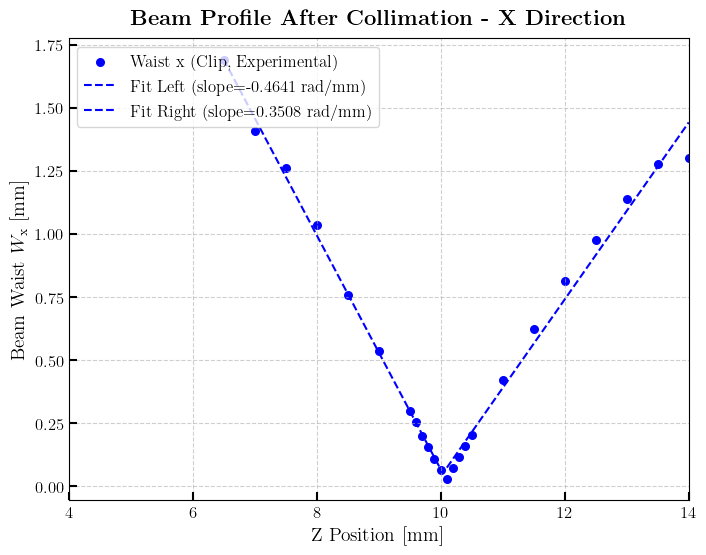

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_collimated/FINAL FINAL/fig/beam_profile_clip_y_4-14mm.png


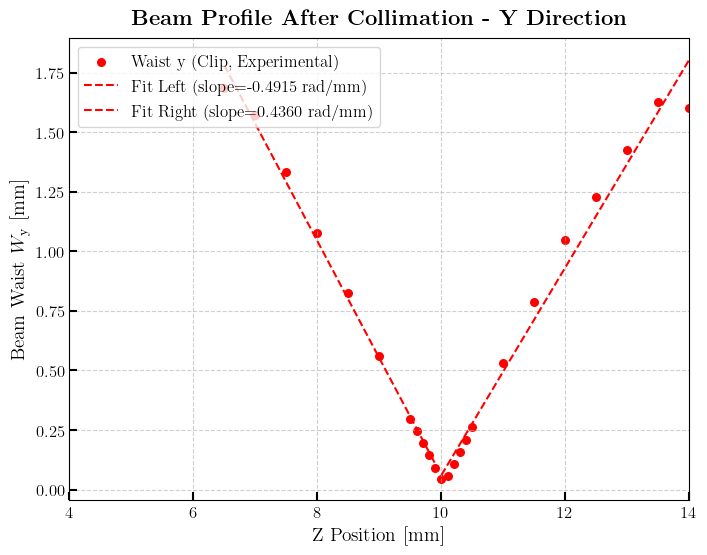

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_collimated/FINAL FINAL"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and
                    float(os.path.basename(f).split('mm')[0].strip()) >= 6.5],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 4 and 14 mm
mask = (z_values >= 4) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 4-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x_filtered) * 1000
min_waist_exp_y = min(width_y_filtered) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (z=4-14 mm):")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Collimation - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x_4-14mm.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Collimation - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y_4-14mm.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt due to missing or invalid Beam Width Clip data.
Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt due to missing or invalid Beam Width Clip data.
Processed 24 valid data points in range 4-14 mm out of 24 total files.
z = 6.5 mm, Width_x = 1.100 mm, Width_y = 1.093 mm
z = 7.0 mm, Width_x = 0.911 mm, Width_y = 0.898 mm
z = 7.5 mm, Width_x = 0.714 mm, Width_y = 0.699 mm
z = 8.0 mm, Width_x = 0.517 mm, Width_y = 0.505 mm
z = 8.5 mm, Width_x = 0.321 mm, Width_y = 0.305 mm
z = 9.0 mm, Width_x = 

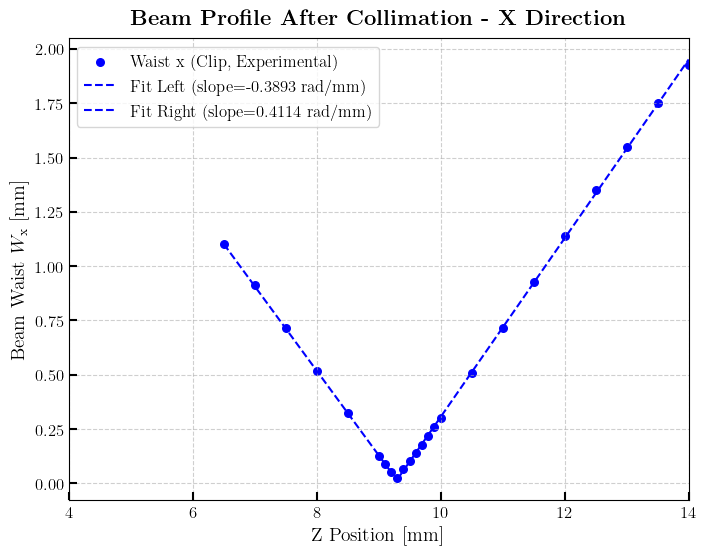

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_clip_y_4-14mm.png


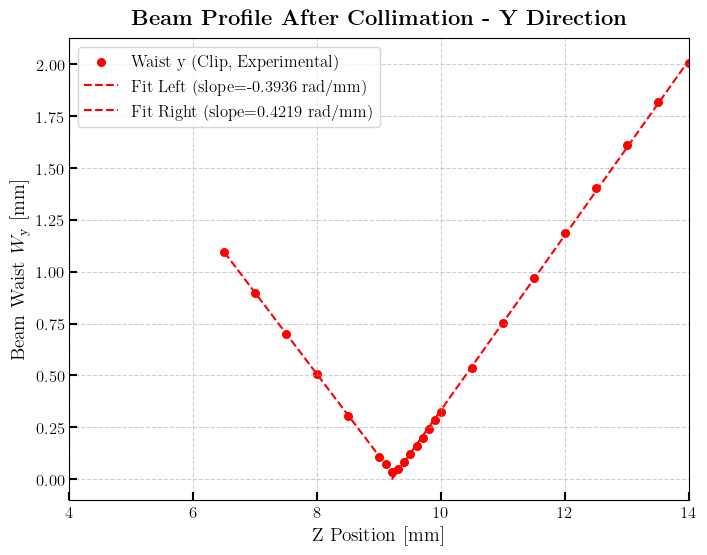

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and
                    float(os.path.basename(f).split('mm')[0].strip()) >= 6.5],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 4 and 14 mm
mask = (z_values >= 4) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 4-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x_filtered) * 1000
min_waist_exp_y = min(width_y_filtered) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (z=4-14 mm):")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Collimation - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x_4-14mm.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Collimation - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y_4-14mm.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/14.5mm_#001.txt due to missing or invalid Beam Width Clip data.
Missing data ('--') in /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt for Beam Width Clip values.
Skipping /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/15mm_#001.txt due to missing or invalid Beam Width Clip data.
Processed 29 valid data points in range 4-14 mm out of 33 total files.
z = 4.0 mm, Width_x = 1.999 mm, Width_y = 2.053 mm
z = 4.5 mm, Width_x = 1.824 mm, Width_y = 1.868 mm
z = 5.0 mm, Width_x = 1.644 mm, Width_y = 1.675 mm
z = 5.5 mm, Width_x = 1.472 mm, Width_y = 1.486 mm
z = 6.0 mm, Width_x = 1.292 mm, Width_y = 1.290 mm
z = 6.5 mm, Width_x = 

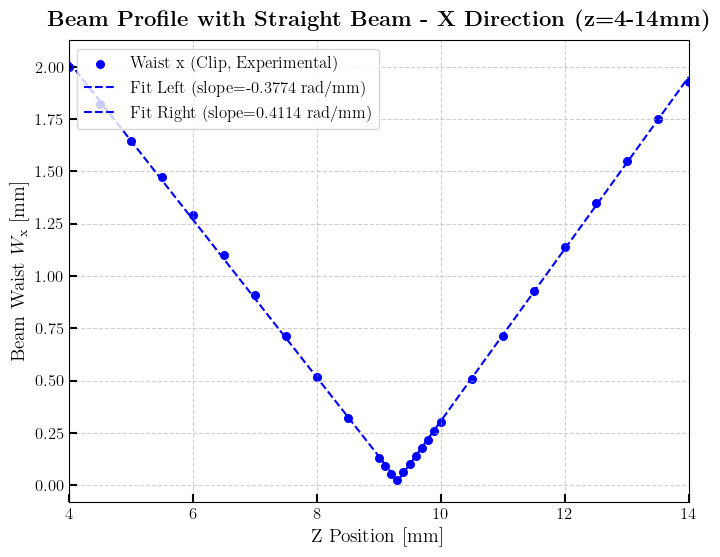

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015/fig/beam_profile_clip_y_4-14mm.png


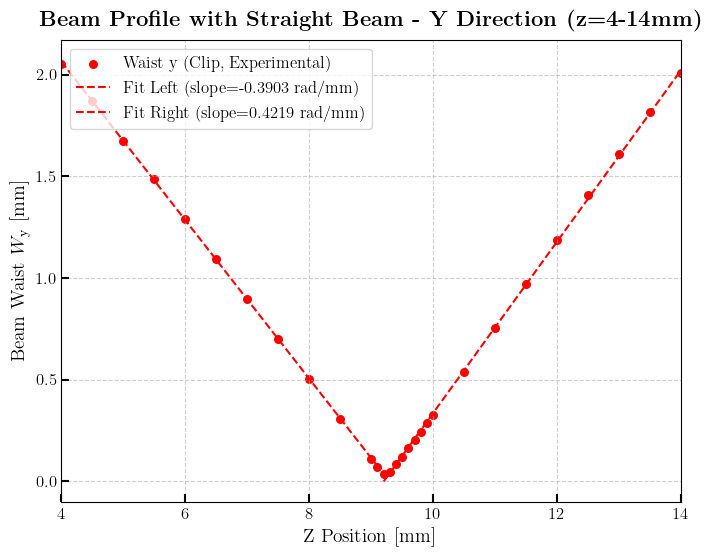

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 4 and 14 mm
mask = (z_values >= 4) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 4-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x_filtered) * 1000
min_waist_exp_y = min(width_y_filtered) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (z=4-14 mm):")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=4-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with Straight Beam - X Direction (z=4-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x_4-14mm.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with Straight Beam - Y Direction (z=4-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4, 14)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y_4-14mm.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 2mm_#001.txt: wx = 6194.43, wy = 6080.63
Processed 2.5mm_#001.txt: wx = 5917.65, wy = 5824.39
Processed 3mm_#001.txt: wx = 5616.55, wy = 5535.25
Processed 4mm_#001.txt: wx = 4997.37, wy = 4866.89
Processed 5mm_#001.txt: wx = 4328.79, wy = 4146.23
Processed 5.5mm_#001.txt: wx = 3969.91, wy = 3760.88
Processed 5.75mm_#001.txt: wx = 3785.49, wy = 3568.14
Processed 6mm_#001.txt: wx = 3599.19, wy = 3376.73
Processed 6.25mm_#001.txt: wx = 3406.52, wy = 3176.28
Processed 6.5mm_#001.txt: wx = 3199.9, wy = 2974.82
Processed 6.75mm_#001.txt: wx = 2992.04, wy = 2768.99
Processed 7mm_#001.txt: wx = 2782.59, wy = 2565.12
Processed 7.25mm_#001.txt: wx = 2568.45, wy = 2364.07
Processed 7.5mm_#001.txt: wx = 2348.17, wy = 2159.8
Processed 7.75mm_#001.txt: wx = 2126.03, wy = 1954.46
Processed 8mm_#001.txt: wx = 1906.73, wy = 1753.21
Processed 8.25mm_#001.txt: wx = 1690.22, wy = 1550.07
Processed 8.6mm_#001.txt: wx = 1383.71, wy = 1261.01
Processed 8.7mm_#001.txt: wx = 1295.47, wy = 1178.52
Pro

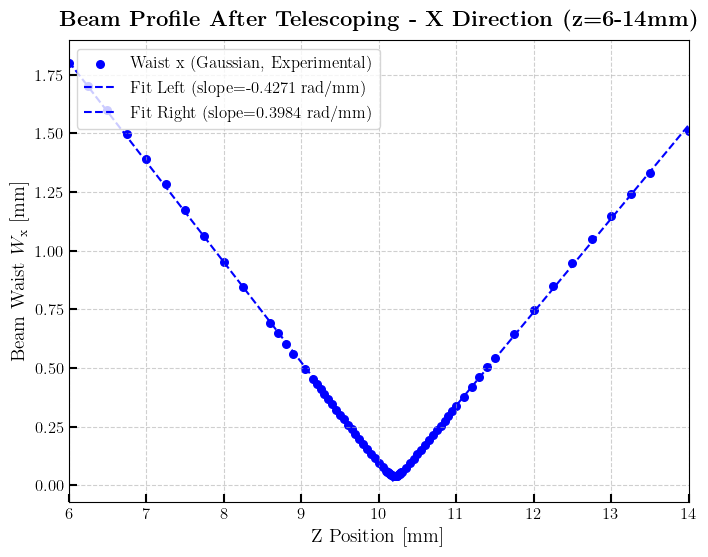

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping/fig/beam_profile_gaussian_y_6-14mm.png


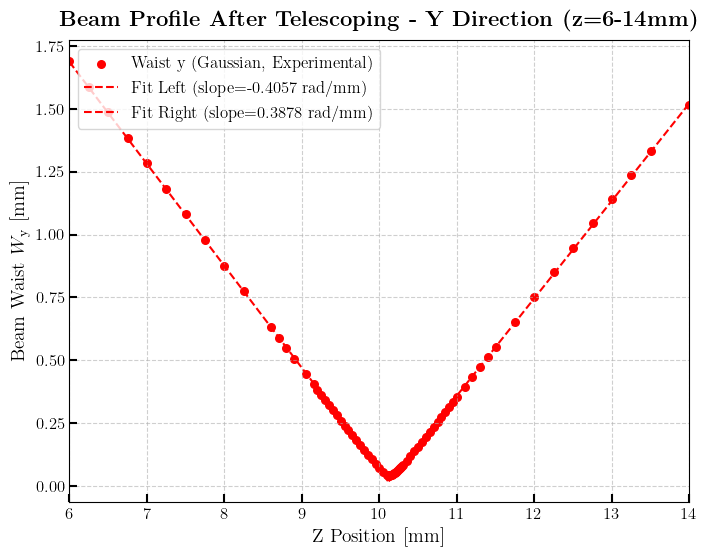

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251016_telescoping"
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower()],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 6) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x_filtered) * 1000
min_waist_exp_y = min(width_y_filtered) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (z=6-14 mm):")
print(f"  Min Waist X (Gaussian): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Gaussian): {min_waist_exp_y:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Gaussian, Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Telescoping - X Direction (z=6-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(6, 14)
save_beam_x = os.path.join(fig_dir, "beam_profile_gaussian_x_6-14mm.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Gaussian, Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Telescoping - Y Direction (z=6-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(6, 14)
save_beam_y = os.path.join(fig_dir, "beam_profile_gaussian_y_6-14mm.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 1mm_#001.txt: wx = 6609.4, wy = 6804.65
Processed 1.5mm_#001.txt: wx = 6272.94, wy = 6506.28
Processed 2mm_#001.txt: wx = 5924.56, wy = 6199.11
Processed 2.5mm_#001.txt: wx = 5607.09, wy = 5886.2
Processed 3mm_#001.txt: wx = 5349.48, wy = 5549.93
Processed 3.5mm_#001.txt: wx = 5108.37, wy = 5249.58
Processed 4mm_#001.txt: wx = 4865.12, wy = 4913.69
Processed 4.5mm_#001.txt: wx = 4595.81, wy = 4593.11
Processed 5mm_#001.txt: wx = 4288.93, wy = 4256.04
Processed 5.5mm_#001.txt: wx = 3930.03, wy = 3896.53
Processed 6mm_#001.txt: wx = 3554.89, wy = 3549.46
Processed 6.5mm_#001.txt: wx = 3165.11, wy = 3176.5
Processed 7mm_#001.txt: wx = 2740.05, wy = 2794.64
Processed 7.5mm_#001.txt: wx = 2288.35, wy = 2380.26
Processed 8mm_#001.txt: wx = 1830.78, wy = 1883.23
Processed 8.5mm_#001.txt: wx = 1407.89, wy = 1354.7
Processed 9mm_#001.txt: wx = 1006.34, wy = 852.12
Processed 9.5mm_#001.txt: wx = 584.39, wy = 364.4
Processed 9.6mm_#001.txt: wx = 502.36, wy = 274.14
Processed 9.7mm_#001.

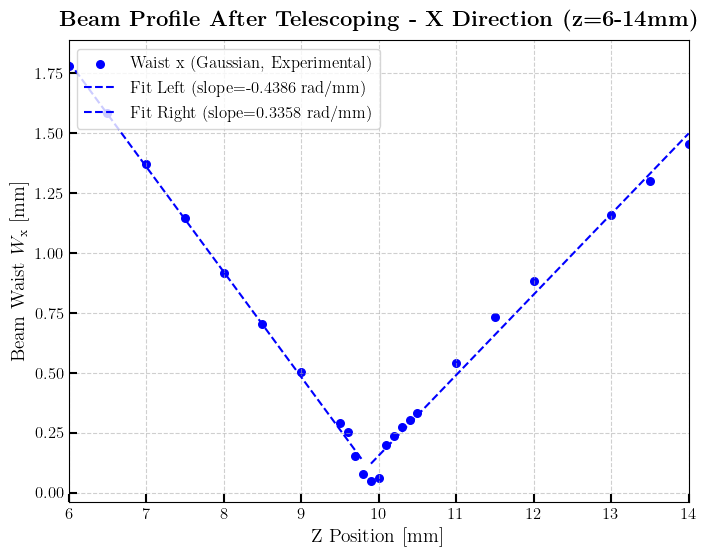

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping/fig/beam_profile_gaussian_y_6-14mm.png


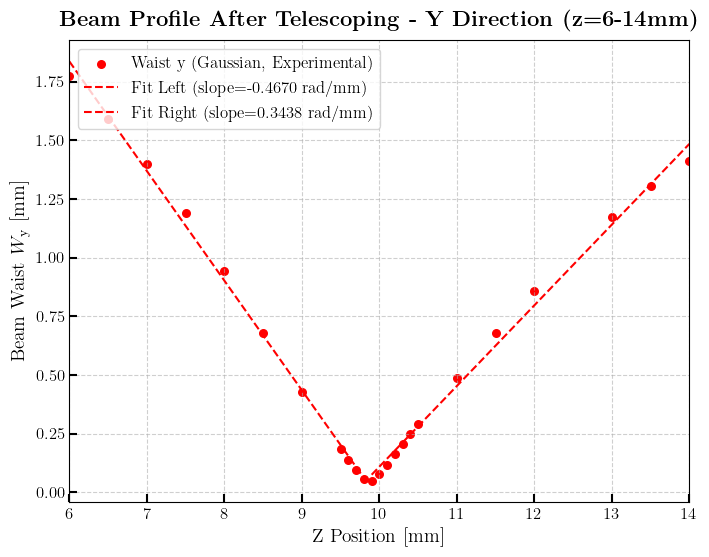

In [7]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251015_telescoping"
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower()],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 6) & (z_values <= 14)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 6-14 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x_filtered) * 1000
min_waist_exp_y = min(width_y_filtered) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental (z=6-14 mm):")
print(f"  Min Waist X (Gaussian): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Gaussian): {min_waist_exp_y:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")
print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Gaussian, Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Telescoping - X Direction (z=6-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(6, 14)
save_beam_x = os.path.join(fig_dir, "beam_profile_gaussian_x_6-14mm.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Gaussian, Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile After Telescoping - Y Direction (z=6-14mm)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(6, 14)
save_beam_y = os.path.join(fig_dir, "beam_profile_gaussian_y_6-14mm.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()